In [49]:
import json
from texttable import Texttable
import latextable
from tabulate import tabulate
import sys
file_directory = "../"
sys.path.append(file_directory)
from generateDataset import generateDatasetFromResults
from metric import calculatePercentageReductionSeries 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

In [2]:
typeIndexLdpPathResult = "../results/standard/type_index_ldp_result.json"
typeIndexLdpPathSummary = "../results/standard/summary_type_index_ldp_result.json"
typeIndexLdpDataset = generateDatasetFromResults(typeIndexLdpPathResult, typeIndexLdpPathSummary, "typeIndexLdp")

In [3]:
shapeIndexPathResult = "../results/standard/shape_index_result.json"
shapeIndexPathSummary = "../results/standard/summary_shape_index_result.json"
shapeIndexDataset = generateDatasetFromResults(shapeIndexPathResult, shapeIndexPathSummary, "shapeIndex")

In [4]:
shapeIndex20PathResult = "../results/shape-index-20-percent/shape_index_result.json"
shapeIndex20PathSummary = "../results/shape-index-20-percent/summary_shape_index_result.json"
shapeIndex20Dataset = generateDatasetFromResults(shapeIndex20PathResult, shapeIndex20PathSummary, "shapeIndex20Percent")

In [5]:
shapeIndex50PathResult = "../results/shape-index-50-percent/shape_index_result.json"
shapeIndex50PathSummary = "../results/shape-index-50-percent/summary_shape_index_result.json"
shapeIndex50Dataset = generateDatasetFromResults(shapeIndex50PathResult, shapeIndex50PathSummary, "shapeIndex50Percent")

In [6]:
shapeIndex80PathResult = "../results/shape-index-80-percent/shape_index_result.json"
shapeIndex80PathSummary = "../results/shape-index-80-percent/summary_shape_index_result.json"
shapeIndex80Dataset = generateDatasetFromResults(shapeIndex80PathResult, shapeIndex80PathSummary, "shapeIndex80Percent")

In [7]:
shapeIndexInnerPathResult = "../results/shape-inner/shape_index_result.json"
shapeIndexInnerPathSummary = "../results/shape-inner/summary_shape_index_result.json"
shapeIndexInnerDataset = generateDatasetFromResults(shapeIndexInnerPathResult, shapeIndexInnerPathSummary, "shapeInner")

In [8]:
shapeIndexMinimalPathResult = "../results/shape-minimal/shape_index_result.json"
shapeIndexMinimalPathSummary = "../results/shape-minimal/summary_shape_index_result.json"
shapeIndexMinimalDataset = generateDatasetFromResults(shapeIndexMinimalPathResult, shapeIndexMinimalPathSummary, "shapeMinimal")

In [9]:
evalInstances = [shapeIndexDataset, shapeIndex20Dataset, shapeIndex50Dataset, shapeIndex80Dataset, shapeIndexInnerDataset, shapeIndexMinimalDataset]

In [10]:
def aggregateReduction(reductionDataset, globalAggregation, aggregationByQuery):
    for query, versions in reductionDataset.items():
        if query not in aggregationByQuery:
            aggregationByQuery[query] = {}
        for i, reduction in enumerate(versions):
            if "v{}".format(i) not in aggregationByQuery[query]:
                aggregationByQuery[query]["v{}".format(i)] = []
            if reduction is not None:
                globalAggregation.append(reduction)
                aggregationByQuery[query]["v{}".format(i)].append(reduction)


In [11]:
generalReductionHttpRequest = []
generalReductionExec = []

reductionHttpRequestByQuery = {}
reductionExecRequestByQuery = {}

for instance in evalInstances:
    currentReductionHttpRequest = calculatePercentageReductionSeries(instance.numberHttpRequest, typeIndexLdpDataset.numberHttpRequest)
    currentReductionExec = calculatePercentageReductionSeries(instance.meanExecutionTime, typeIndexLdpDataset.meanExecutionTime)
    
    aggregateReduction(currentReductionHttpRequest, generalReductionHttpRequest, reductionHttpRequestByQuery)
    aggregateReduction(currentReductionExec, generalReductionExec, reductionExecRequestByQuery)
 

In [12]:
reductionHttpRequestByQuery

{'interactive-discover-1': {'v0': [35.07462686567165,
   5.223880597014925,
   5.223880597014925,
   37.3134328358209,
   39.55223880597015,
   42.53731343283582],
  'v1': [40.0, 56.00000000000001, 56.00000000000001, 40.0, 52.0, 68.0],
  'v2': [21.73913043478261,
   0.0,
   -21.73913043478261,
   -65.21739130434783,
   47.82608695652174,
   65.21739130434783],
  'v3': [85.65217391304348,
   89.13043478260869,
   89.13043478260869,
   87.39130434782608,
   88.26086956521739,
   90.0],
  'v4': [41.86046511627907,
   48.06201550387597,
   48.06201550387597,
   -12.4031007751938,
   46.51162790697674,
   49.6124031007752]},
 'interactive-discover-2': {'v0': [5.223880597014925,
   5.223880597014925,
   5.223880597014925,
   37.3134328358209,
   9.701492537313433,
   12.686567164179104],
  'v1': [40.0, 52.0, 52.0, 40.0, 48.0, 64.0],
  'v2': [17.391304347826086,
   65.21739130434783,
   52.17391304347826,
   30.434782608695656,
   43.47826086956522,
   60.86956521739131],
  'v3': [5.217391304

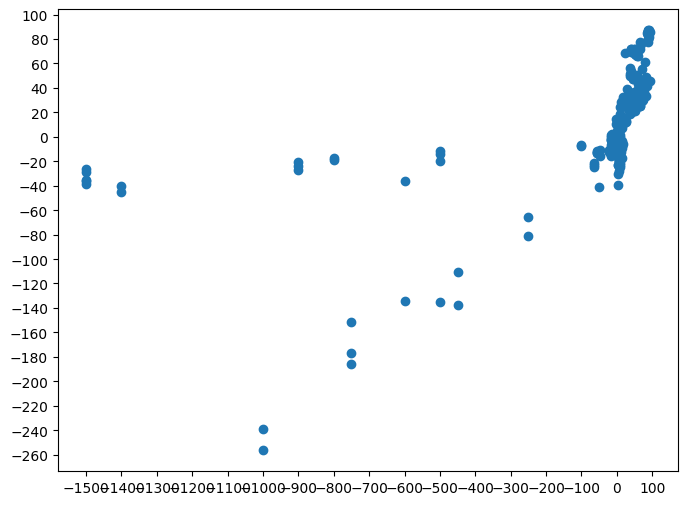

In [13]:
x = np.array(generalReductionHttpRequest)
y = np.array(generalReductionExec)

b, a = np.polyfit(x, y, deg=1)

indexes = np.linspace(-1500, 100, 10)

fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_locator(MultipleLocator(100))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(20)) # Set major ticks every 20 units on y-axis

ax.scatter(x, y)

In [22]:
def dividePoints(x, y, threshold):
    x_right = []
    y_right = []

    x_left = []
    y_left = []
    
    for i, val in enumerate(x):
        if val>threshold:
            x_right.append(val)
            y_right.append(y[i])
        else:
            x_left.append(val)
            y_left.append(y[i])
    return ((x_right, y_right), (x_left,y_left))

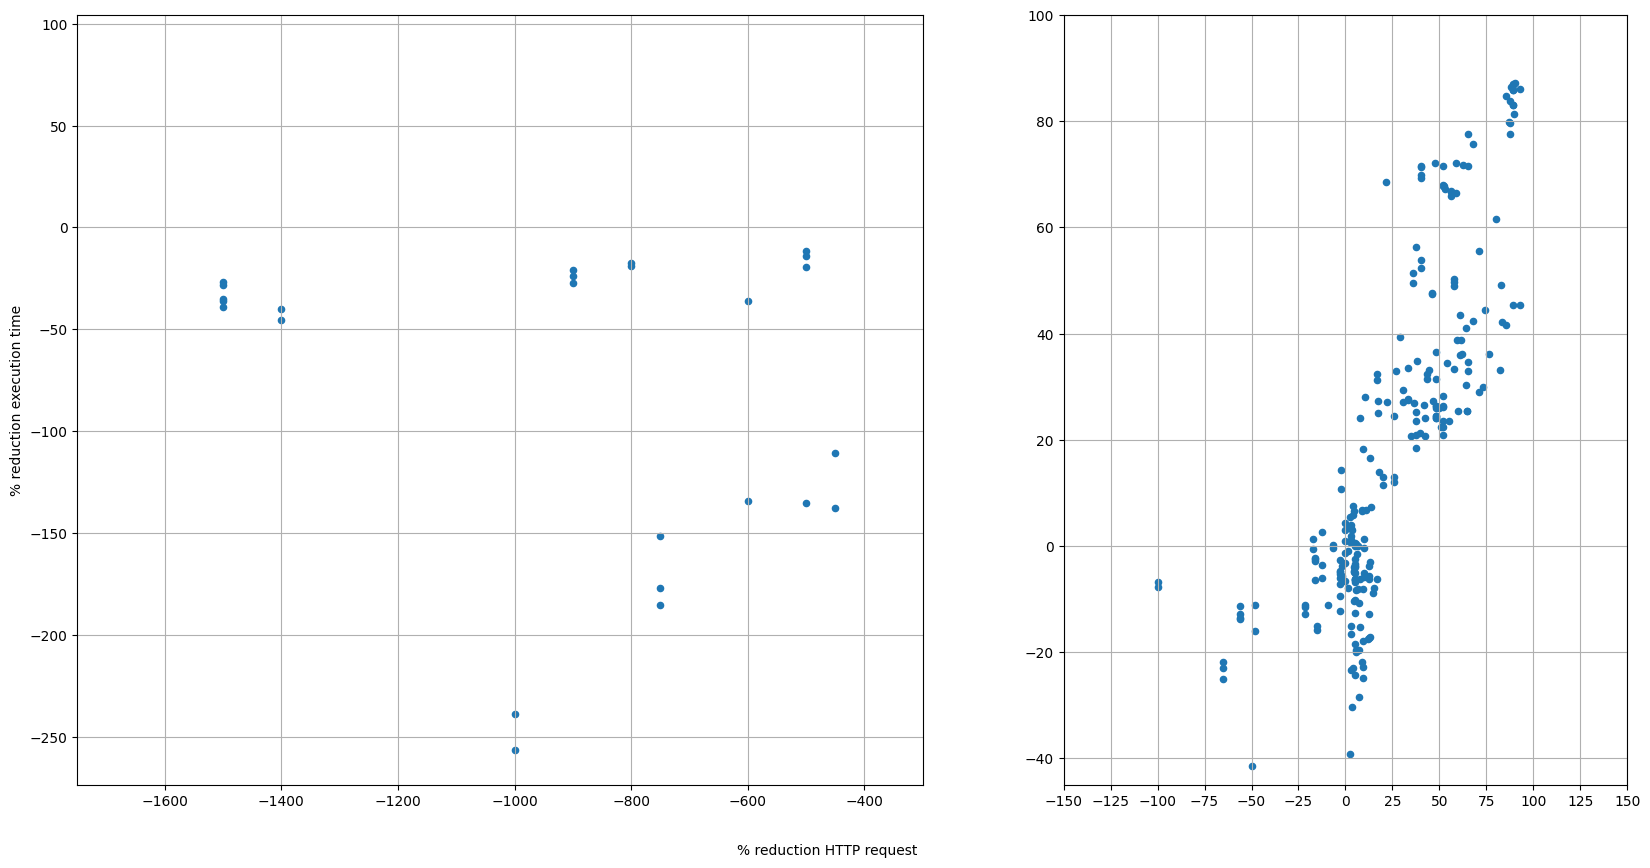

In [18]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10), width_ratios=[1.5, 1])  # Control width with ratios

ax1.grid(axis="both")
ax2.grid(axis="both")

# Plot the data on both subplots
s=20
ax1.scatter(x, y, s=s)
ax2.scatter(x, y, s=s)

# Set x-axis limits to create the cut
ax1.set_xlim(-1750, -300)  # Left side of the cut
ax2.set_ylim(-250, 0) 

ax2.set_xlim(-150, 150)       # Right side of the cut
ax2.set_ylim(-45, 100) 
ax2.xaxis.set_major_locator(MultipleLocator(25))  # Set major ticks every 5 units on x-axis
ax2.yaxis.set_major_locator(MultipleLocator(20)) # Set major ticks every 20 units on y-axis

# Labels and titles
fig.text(0.5, 0.04, '% reduction HTTP request', ha='center')
ax1.set_ylabel('% reduction execution time')

plt.show()

In [53]:
corr, _ = pearsonr(x,y)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 0.5702199564033508


In [26]:
x = np.array(generalReductionHttpRequest)
y = np.array(generalReductionExec)

((x_right, y_right), (x_left,y_left)) = dividePoints(x,y, -125)

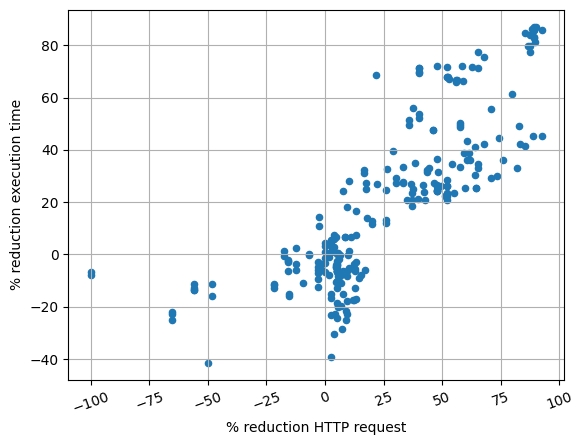

In [47]:
# Create a figure with two subplots
fig, ax = plt.subplots()  # Control width with ratios

ax.grid(axis="both")

# Plot the data on both subplots
s=20
ax.scatter(x_right, y_right, s=s)

# Set x-axis limits to create the cut

#ax.set_xlim(-150, 150)       # Right side of the cut
ax.xaxis.set_major_locator(MultipleLocator(25))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(20)) # Set major ticks every 20 units on y-axis
ax.tick_params(axis='x', rotation=20)

# Labels and titles
ax.set_xlabel('% reduction HTTP request')
ax.set_ylabel('% reduction execution time')

plt.show()

In [51]:
corr, _ = pearsonr(x_right,y_right)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 0.8165853971129066


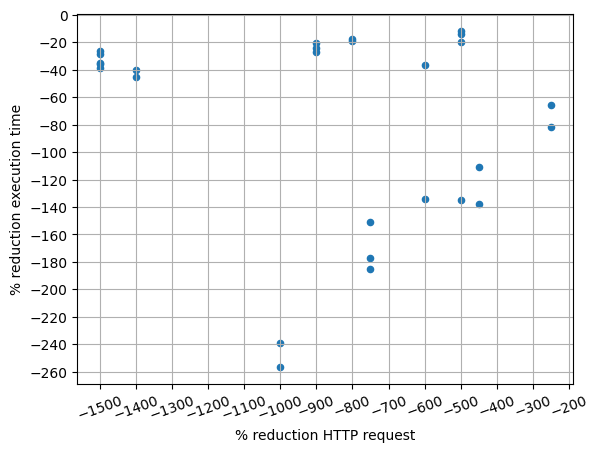

In [46]:
# Create a figure with two subplots
fig, ax = plt.subplots()  # Control width with ratios

ax.grid(axis="both")

# Plot the data on both subplots
s=20
ax.scatter(x_left, y_left, s=s)

# Set x-axis limits to create the cut

#ax.set_xlim(-1750, -300)  # Left side of the cut

ax.xaxis.set_major_locator(MultipleLocator(100))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(20)) # Set major ticks every 20 units on y-axis
ax.tick_params(axis='y', rotation=20)


# Labels and titles
ax.set_xlabel('% reduction HTTP request')
ax.set_ylabel('% reduction execution time')

plt.show()

In [52]:
corr, _ = pearsonr(x_left,y_left)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: -0.19576299149625712


0.5530346350796299


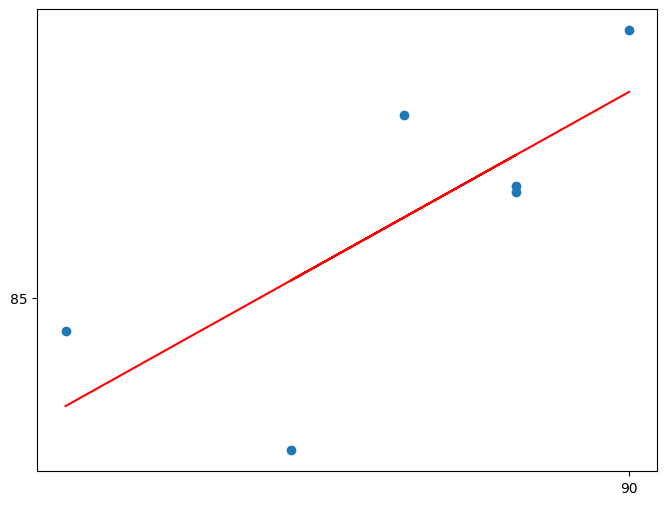

In [166]:
httpReq = reductionHttpRequestByQuery['interactive-discover-1']['v3']
execTime = reductionExecRequestByQuery['interactive-discover-1']['v3']

x = np.array(httpReq)
y = np.array(execTime)

b, a = np.polyfit(x, y, deg=1)
y_pred = np.polyval((b, a), x)

# Calculate R-squared
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_locator(MultipleLocator(5))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(5)) # Set major ticks every 20 units on y-axis

ax.scatter(x, y)
ax.plot(x, y_pred, color='red', label=f'Linear Fit (R²={r_squared:.2f})')

print(r_squared)

In [186]:
RSquareByQueries = {}
for queryTemplate, httpRequestQueries in reductionHttpRequestByQuery.items():
    RSquareByQueries[queryTemplate] = {}
    execTimeQueries = reductionExecRequestByQuery[queryTemplate]
    for version, httpRequests in httpRequestQueries.items():
        execTimes = execTimeQueries[version]
                
        x = np.array(httpRequests)
        y = np.array(execTimes)
        if len(x)==0 or len(y)==0:
            RSquareByQueries[queryTemplate][version] = None
            continue
            
        b, a = np.polyfit(x, y, deg=1, full=False)
        y_pred = np.polyval((b, a), x)
        
        # Calculate R-squared
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        RSquareByQueries[queryTemplate][version] = (r_squared, b, a)

In [187]:
RSquareByQueries

{'interactive-discover-1': {'v0': (np.float64(0.971809847863009),
   np.float64(0.7420190236295158),
   np.float64(-7.9305861059575316)),
  'v1': (np.float64(0.13385535628835665),
   np.float64(0.12104744815924195),
   np.float64(63.52958421933189)),
  'v2': (np.float64(0.8388388044210916),
   np.float64(0.9020015751903039),
   np.float64(23.203140527430836)),
  'v3': (np.float64(0.5530346350796299),
   np.float64(0.5694553531311068),
   np.float64(35.371207361311264)),
  'v4': (np.float64(0.9703799280659783),
   np.float64(0.5271872951283598),
   np.float64(0.9663324347156179))},
 'interactive-discover-2': {'v0': (np.float64(0.8119537004746562),
   np.float64(0.6818590218415955),
   np.float64(-8.826678442708076)),
  'v1': (np.float64(0.5499798529778759),
   np.float64(-1.9955307633203243),
   np.float64(138.92205725965277)),
  'v2': (np.float64(0.5732271128031333),
   np.float64(0.13407036066925238),
   np.float64(24.858383985111146)),
  'v3': (np.float64(0.9990873315867347),
   np.f

Slope (forced through origin): 2.883597937856058


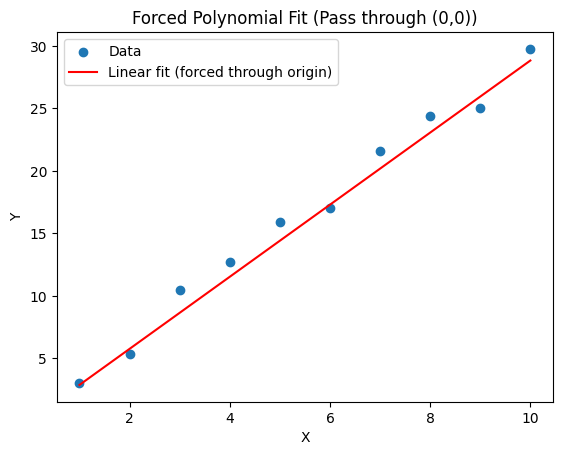

In [181]:
# Example data
x = np.linspace(1, 10, 10)
y = 3 * x + np.random.normal(0, 1, x.size)  # Linear relation with some noise

# Perform linear fit but force the fit to pass through (0, 0)
coefficients = np.polyfit(x, y, 1, full=False, w=np.ones_like(x))

# Display the coefficients (slope, intercept)
print("Slope (forced through origin):", coefficients[0])

# Calculate the fitted values based on the model (without an intercept)
y_fit = coefficients[0] * x

# Plot data and the forced fit
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, color='red', label=f'Linear fit (forced through origin)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Forced Polynomial Fit (Pass through (0,0))')
plt.show()